In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Pandas Challenges**


**Topic**: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

**Data**: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: `2013_movies.csv`

**Challenge 1**

Plot domestic total gross over time.

Text(0.5,0,'Date')

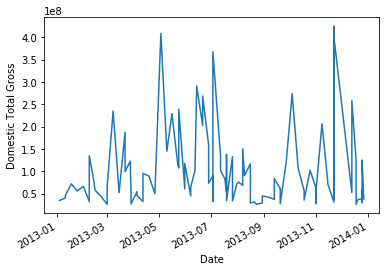

In [51]:
df = pd.read_csv('2013_movies.csv')
df.head()
df['ReleaseDate']=pd.to_datetime(df.ReleaseDate)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df.sort_values(by='ReleaseDate', inplace=True)
ax = df.plot(x='ReleaseDate', y='DomesticTotalGross', legend=False)
ax.set_ylabel('Domestic Total Gross')
ax.set_xlabel('Date')

**Challenge 2**

Plot runtime vs. domestic total gross.

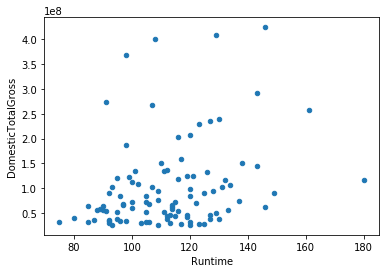

In [49]:
ax = df.plot(x='Runtime', y='DomesticTotalGross', legend=False, kind='scatter')

**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [57]:
df.groupby('Rating').mean()[['DomesticTotalGross', 'Runtime']]

,DomesticTotalGross,Runtime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

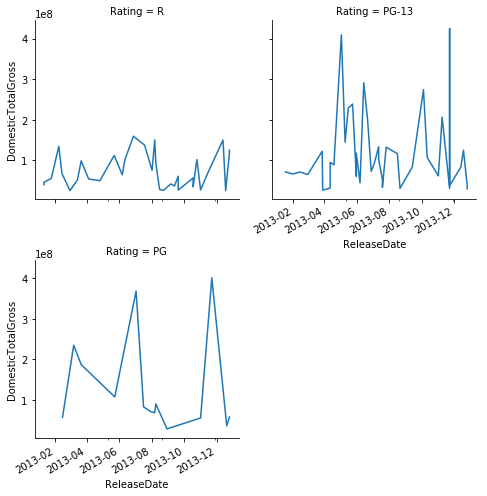

In [83]:
#there is only a single G movie in the sample, which means the lineplot throws an error

def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)

df2=df[df.Rating != 'G']
    
g = sns.FacetGrid(df2, col="Rating", col_wrap=2, height=3.5)
g = g.map_dataframe(dateplot, "ReleaseDate", "DomesticTotalGross")

**Challenge 5**

What director in your dataset has the highest gross per movie?

In [88]:
#this gives the director with the highest mean total gross

df.groupby('Director').mean()[['DomesticTotalGross']].sort_values(by='DomesticTotalGross', ascending=False).head(1)

,DomesticTotalGross
Director,
Francis Lawrence,424668047.0


**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."

In [96]:
df['Month'] = df.ReleaseDate.apply(lambda x: x.month)

In [118]:
means = df.groupby('Month').mean()[['DomesticTotalGross']]
stdevs = df.groupby('Month').std()[['DomesticTotalGross']]

Text(0,0.5,'Domestic Total Gross')

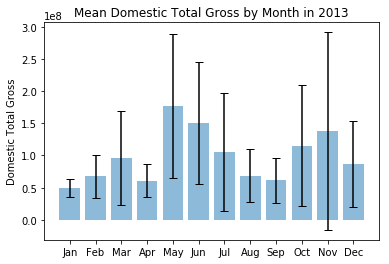

In [146]:
ax = plt.bar(x=months, height=means.values.reshape(12), 
             yerr=stdevs.values.reshape(12), 
             align='center', alpha=0.5, ecolor='black', capsize=4)
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.ylabel('Domestic Total Gross')


The formula for standard error of the mean is

${\sigma }_{\bar {x}}\ ={\frac {\sigma }{\sqrt {n}}}$

where ${\sigma }$ is the standard deviation of the population, and ${n}$ is the number of observations in the sample.

The error bars seem very large, particularly for Nov.  This is when Hunger Games 2 and Frozen were released, so a couple of blockbusters are skewing the data.  Even then, ${2}{\sigma }$ confidence intervals would exceed the mean Domestic Total Gross.

In [152]:
df[df.Month==11]

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Month
56,Ender's Game,110000000.0,61737191,Gavin Hood,PG-13,114,2013-11-01,11
55,Last Vegas,28000000.0,63914167,Jon Turteltaub,PG-13,90,2013-11-01,11
94,Dallas Buyers Club,5000000.0,27298285,Jean-Marc Vallee,R,117,2013-11-01,11
62,Free Birds,55000000.0,55750480,Jimmy Hayward,PG,90,2013-11-01,11
11,Thor: The Dark World,170000000.0,206362140,Alan Taylor,PG-13,120,2013-11-08,11
49,The Best Man Holiday,17000000.0,70525195,Malcolm D. Lee,R,122,2013-11-15,11
90,Delivery Man,26000000.0,30664106,Ken Scott,PG-13,105,2013-11-22,11
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11
79,Philomena,12000000.0,37709979,Stephen Frears,PG-13,95,2013-11-22,11
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11


In [ ]:
#a meaningless comment for github reasons